import os
import sys
import warnings
import numpy as np

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import geomstats.backend as gs
from geomstats.geometry.spd_matrices import SPDMatrices
import geomstats.visualization as viz
import math

In [3]:
import os
import sys
import warnings
import numpy as np

#sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import geomstats.backend as gs
from geomstats.geometry.spd_matrices import SPDMatrices
import geomstats.visualization as viz
import math


INFO: Using numpy backend


In [4]:
def surface_graph(x, y):
    return np.sqrt((x**2 + y**2))


def surface_immersion(intrinsic_coords):
    x = intrinsic_coords[..., 0]
    y = intrinsic_coords[..., 1]
    return gs.transpose(gs.array([x, y, surface_graph(x, y)]))

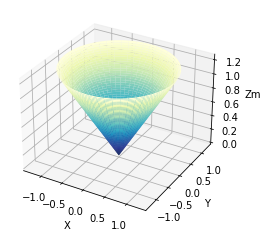

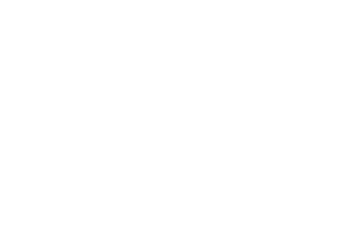

In [5]:
def plot_surface(alpha=1.0, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
    
    r = np.linspace(0, 1.25, 50)
    p = np.linspace(0, 2*np.pi, 50)
    R, P = np.meshgrid(r, p)
    #Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
    X, Y = R*np.cos(P), R*np.sin(P)
    Z=surface_graph(X,Y)
    
    ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Zm")
    plt.show()
    return ax



ax = plot_surface()
ax.grid(True)
plt.axis("off");


SyntaxError: invalid syntax (3534585312.py, line 1)

# Introduction



Symmetric Positive Definite (SPD) matrices are often encountered and have made great success in a variety of areas such as medical imaging, visual recognition and data analysis. However, the computations on SPD matrices often accompany with the challenge of their non-Euclidean data structure that underlies a Riemannian manifold. Several Riemannian metrics have been introduced in order to encode the Riemannian geometry of SPD manifolds properly.

A symmetric matrix is a square matrix that is equal to its transpose,$\newline$
i.e. $A$ is symmetric $\Leftrightarrow A^T = A$ $\newline$ An $n \times n $ symmetric real matrix $A$ is $\textbf{positive definite}$ if $x^TAx > 0$ for all non-zero $x \in \Re^n$
## Useful Properties
Some useful properties of SPD matrices include the following:


1. All the eigenvalues of a SPD Matrix are striclty positive$\newline$
1.All the subdeterminats of a SPD Matrix are positive$\newline$
1.Every SPD Matrix has a unique Cholesky Decomposistion such as $A=LL^T$ where $L$ is a a real lower triangular matrix with positive diagonal entries.


## Mathematical definition of the manifold
As this kind of matrix is symmetric, its $𝑛(𝑛+1)/2$ upper diagonal terms are enough to represent it. Hence, we can consider such a matrix as a point in $\Re^{\frac{n(n+1)}{2}}$.
Also we know that a conical combination of two positive definite matrices is also positive definite. Hence, the set of all symmetric positive definite matrices forms an open convex cone $\mathcal{P} \in \Re^{\frac{n(n+1)}{2}}$ with apex on the origin.

The set of all symmetric positive semidefinite matrices of particular dimension M is called
the $\textit{positive semidefinite cone}$:$\newline$ $\begin{equation}
\begin{aligned}\mathbb{S}^M_+ &\overset{\Delta}{=} \{ A \in \mathbb{S}^M \vert A \succeq 0\}
\\\\& = \{ A \in \mathbb{S}^M \vert A \succeq 0\} 
\\\\&= \{ A \in \mathbb{S}^M \vert y^TAy \geq 0 \text{  } \forall \text{  }\|y\|=1\}
\\\\&= \bigcap\limits_{\|y\|=1}\{ A \in \mathbb{S}^M \vert \langle y^Ty,A\rangle \geq0\}
\\\\&= \{A \in\mathbb{S}^M_+ \vert \text{ rank } A \leq M \}\end{aligned}
\end{equation}$



The positive definite (full-rank) matrices comprise the cone $\textit{interior}$:$\newline$$\begin{equation}
\begin{aligned}\text{intr}\mathbb{S}^M_+ &\overset{\Delta}{=} \{ A \in \mathbb{S}^M \vert A \succ 0\}
\\\\& = \{ A \in \mathbb{S}^M \vert A \succ 0\} 
\\\\&= \{ A \in \mathbb{S}^M \vert y^TAy > 0 \text{  }  \forall \text{  }\|y\|=1\}
\\\\&= \bigcap\limits_{\|y\|=1}\{ A \in \mathbb{S}^M \vert \langle y^Ty,A\rangle >0\}
\\\\&= \{A \in\mathbb{S}^M_+ \vert \text{ rank } A = M \}\end{aligned}
\end{equation}$


A straightforward metric
is the Frobenius norm between SPD matrices which is an
extension of the Euclidean measure, but several undesirable
effects may occur since the Frobenius norm ignores the manifold geometrical structure, such as the swelling of diffusion
tensors.

The SPD manifold is a topological space
locally similar to Euclidean space and with globally defined differential structure, which makes it possible to
define the derivatives of the curves on the manifold

## Real World uses of SPD Manifold








1. $\textbf{Computational Neuroscience}$ $\newline$ 
The topological patterns of brain networks are closely related to the brain functional organizations and the connection breakdown between the relevant brain regions has an
intimate association with the progress of neurodegenerative diseases. Interactions among these brain regions are often characterized by the cross-correlation matrix of spontaneous fluctuations observed in fMRIs. Cross-correlation matrices, belong to the family of symmetric positive definite (SPD) matrices.$\newline$

1. $\textbf{Image Set Clasification}$ $\newline$
In image set classification, images that belong to the same class are viewed as an image set. The most representative samples are extracted from the set in order for a proper model or probability distribution to be learned to represent the intrinsic property of this set. The basic principle of image set classification is that, the measure of similarity is based on comparison between the most similar parts of two sets. The manifold of SPD matrices has been successfully used for data representation in image set classification.$\newline$

1. $\textbf{Action Recognition}$ $\newline$
The feature covariance matrices are have been widely exploited in terms of action recognition tasks. The family of all
covariance matrices of a given order coincides with the
family of all symmetric matrices of the same order which is closed under linear combinations. Therefore, a benchmark approach includes the transformation of the classification problem in the closed convex
cone of covariance matrices into an equivalent problem in the
vector space of symmetric matrices via the matrix logarithm.$\newline$

1. $\textbf{Gesture Recognition}$ $\newline$
Covariance descriptors give us a good feature representation of the interior of an image region with the form of a normalised covariance matrix. As previously mentioned covariance matrices belong to the group of symmetric positive
definite matrices.$\newline$